<img src="http://stemfellowship.org/wp-content/uploads/2016/10/STEMF-logo-blue-no-back-6.png" alt="STEM Fellowship" style="width:500px;height:120px;">

<h1 style="font-family:georgia;"><p style="text-align: center;"> Welcome to the R for Data Science Workshop! </p></h1>

The Big Data Challenge is a wonderful opporunity to learn new skills in a growing field of STEM, but we know how tough it can be to do something for the first time. These workshops were developed to help newcomers to coding and to Data Science grow comfortable with programming and the Data Science process.  
Have a burning question you want to ask? Feel free to contact us with any comments, questions, or concerns.  
Best wishes,  
The Data Science Team

## THE PROBLEM
An interesting fact about space launches is that solid-fuel rockets emit chlorine gas that can destroy the ozone in the stratosphere. If space travel is in our future, does that mean that the ozone layer is doomed?
Well, not necessarily. SpaceX rockets, for example, are liquid-fuel, and don't contain the chlorine that solid-fuel rockets do. They're also promising products in the development of space travel. To see if these rockets are the solution to ozone-friendly space travel, we can take a look at ozone levels over time and make note of when SpaceX launches occur.
Additionally, we can see if there's any other factors to look into with SpaceX Launches.

## SETUP
To download R, follow the instructions [here](https://cloud.r-project.org/).  
Recommended: RStudio is a user-friendly IDE for R. You can download it [here](https://www.rstudio.com/products/rstudio/download/).

Before we start with any code, I'm going to run two lines of code for the jupyter notebooks to a) remove warnings and b) resize pictures. **Do NOT do this for your own notebook**, as warnings are often helpful diagnostic tools and I am doing thise solely for readability.

In [1]:
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
options(warn=-1)

## DATA
The first thing to do is to gather data. We want our data to comprise of SpaceX Launches and ozone concentrations. Since that combination is pretty specific, our best bet is to find data on ozone concentrations and data on SpaceX Launches, and then combine them.
For this data
We want data on SpaceX Launches first, so that's where we'll start!

R supports different types of data file types, but we'll be dealing with **.csv**, or comma-separated value files. Additionally, there are a few different ways of accessing data - using a direct link, downloading the data and referencing the file, or using an API. For this dataset, we can look at how to use to bring in SpaceX Launch data using a direct link.
The dataset we are referencing was [taken from Kaggle](https://www.kaggle.com/scoleman/spacex-launch-data) and can be found in the GitHub for the 2019 BDC Workshops [here](https://github.com/bigdatachallenge/2019_bdc_workshops/blob/master/spacex_launch_data.csv). In order for R to be able to interpret the data, we need it to be in raw format. You can access this format by pressing the 'Raw' button or by clicking [here](https://raw.githubusercontent.com/bigdatachallenge/2019_bdc_workshops/master/spacex_launch_data.csv).)
(By the way, now you know why it's called a comma-separated value file!)

So now we have a link!
https://github.com/bigdatachallenge/2019_bdc_workshops/blob/master/spacex_launch_data.csv

To start with, base R has a read.csv() function that can turn our data into a data frame. However, it tends to be slow and it has some drawbacks. We want to use a faster function to read our data. We'll have to use a **package**, or a collection of code, that allows us to do so. For R, this package is **readr**. We'll use **install.packages()** to install data.table, and then **library()** to get the code ready.

In [2]:
install.packages("readr", repos='http://cran.r-project.org', force=TRUE)
library("readr")

Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


The data.table package has a nifty function called **read_csv()**. We can pass our link into it. Let's **store the data** into a **variable** called SpaceX_Launches.

In [3]:
SpaceX_Launches<-read_csv('https://raw.githubusercontent.com/bigdatachallenge/2019_bdc_workshops/master/spacex_launch_data.csv')

Parsed with column specification:
cols(
  `Flight Number` = col_character(),
  Date = col_date(format = ""),
  `Time (UTC)` = col_time(format = ""),
  `Booster Version` = col_character(),
  `Launch Site` = col_character(),
  Payload = col_character(),
  `Payload Mass (kg)` = col_character(),
  Orbit = col_character(),
  Customer = col_character(),
  `Mission Outcome` = col_character(),
  `Landing Outcome` = col_character()
)


We can take a look at the first six rows of our dataset using the **head()** function.

In [4]:
head(SpaceX_Launches)

Flight Number Date       Time (UTC) Booster Version Launch Site
1 1             2010-06-04 18:45:00   F9 v1.0  B0003  CCAFS LC-40
2 2             2010-12-08 15:43:00   F9 v1.0  B0004  CCAFS LC-40
3 3             2012-05-22 07:44:00   F9 v1.0  B0005  CCAFS LC-40
4 4             2012-10-08 00:35:00   F9 v1.0  B0006  CCAFS LC-40
5 5             2013-03-01 15:10:00   F9 v1.0  B0007  CCAFS LC-40
6 6             2013-09-29 16:00:00   F9 v1.1  B1003  VAFB SLC-4E
  Payload                                                       
1 Dragon Spacecraft Qualification Unit                          
2 Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese
3 Dragon demo flight C2+                                        
4 SpaceX CRS-1                                                  
5 SpaceX CRS-2                                                  
6 CASSIOPE                                                      
  Payload Mass (kg) Orbit     Customer        Mission Outcome
1 NA                LEO       SpaceX          Success        
2 NA                LEO (ISS) NASA (COTS) NRO Success        
3 525               LEO (ISS) NASA (COTS)     Success        
4 500               LEO (ISS) NASA (CRS)      Success        
5 677               LEO (ISS) NASA (CRS)      Success        
6 500               Polar LEO MDA             Success        
  Landing Outcome      
1 Failure   (parachute)
2 Failure   (parachute)
3 No attempt           
4 No attempt           
5 No attempt           
6 Uncontrolled (ocean)

Now that we have our data, we should get an idea of what our data contains. We can do this using the **summary()** function in base R.

In [5]:
summary(SpaceX_Launches)

 Flight Number           Date             Time (UTC)       Booster Version   
 Length:57          Min.   :2010-06-04   Length:57         Length:57         
 Class :character   1st Qu.:2015-02-11   Class1:hms        Class :character  
 Mode  :character   Median :2017-01-14   Class2:difftime   Mode  :character  
                    Mean   :2016-04-14   Mode  :numeric                      
                    3rd Qu.:2017-10-11                                       
                    Max.   :2018-06-04                                       
 Launch Site          Payload          Payload Mass (kg)     Orbit          
 Length:57          Length:57          Length:57          Length:57         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

This gives us some insight into what our data is saying. We see that it spans the years from 2010 to 2018, with the median being at 2017. We can see there are fifty-seven flights recorded by the length indicated under each variable. We also see a a problem; the Payload Mass is a **character** value when it should probably be a **numeric** value.

With this insight, we are ready to start cleaning. Let's take a look at the Payload Mass column.

In [6]:
SpaceX_Launches$'Payload Mass (kg)'

[1] NA           NA           "525 "       "500 "       "677 "      
 [6] "500 "       "3,170 "     "3,325 "     "2,296 "     "1,316 "    
[11] "4,535 "     "4,428 "     "2,216 "     "2,395 "     "570 "      
[16] "4,159 "     "1,898 "     "4,707 "     "1,952 "     "2,034 "    
[21] "553 "       "5,271 "     "3,136 "     "4,696 "     "3,100 "    
[26] "3,600 "     "2,257 "     "4,600 "     "9,600 "     "2,490 "    
[31] "5,600 "     "5,300 "     "Classified" "6,070 "     "2,708 "    
[36] "3,669 "     "9,600 "     "6,761 "     "3,310 "     "475 "      
[41] "4,990 "     "9,600 "     "5,200 "     "3,500 "     "2,205 "    
[46] "9,600 "     "Classified" "4,230 "     "~1,250 "    "2,150 "    
[51] "6,092 "     "9,600 "     "2,647 "     "362 "       "3,600 "    
[56] "6,460 "     "5,384 "

We can immediately understand why the data is a character - there are 'Classified' values and a value that estimates with a tilde in front of it. Lastly, there are spaces at the end of every value. We can filter these out using the **gsub()** and **substring()** functions. 

In [7]:
SpaceX_Launches$'Payload Mass (kg)'<-gsub(",", "", SpaceX_Launches$'Payload Mass (kg)')
SpaceX_Launches$'Payload Mass (kg)'<-gsub(" ", "", SpaceX_Launches$'Payload Mass (kg)')
SpaceX_Launches$'Payload Mass (kg)'<-gsub("Classified", NA, SpaceX_Launches$'Payload Mass (kg)')
SpaceX_Launches$'Payload Mass (kg)'<-gsub("~", "", SpaceX_Launches$'Payload Mass (kg)')
SpaceX_Launches$'Payload Mass (kg)'<-substr(SpaceX_Launches$'Payload Mass (kg)', 1,nchar(SpaceX_Launches$'Payload Mass (kg)')-1)
SpaceX_Launches$'Payload Mass (kg)'

[1] NA     NA     "525"  "500"  "677"  "500"  "3170" "3325" "2296" "1316"
[11] "4535" "4428" "2216" "2395" "570"  "4159" "1898" "4707" "1952" "2034"
[21] "553"  "5271" "3136" "4696" "3100" "3600" "2257" "4600" "9600" "2490"
[31] "5600" "5300" NA     "6070" "2708" "3669" "9600" "6761" "3310" "475" 
[41] "4990" "9600" "5200" "3500" "2205" "9600" NA     "4230" "1250" "2150"
[51] "6092" "9600" "2647" "362"  "3600" "6460" "5384"

Now that the characters are all readable numbers, we can convert them to numeric values.

In [8]:
SpaceX_Launches$'Payload Mass (kg)'<-as.numeric(SpaceX_Launches$'Payload Mass (kg)')

All cleaned up! Now this is cleaner data. Maybe we can even plot it on a graph!

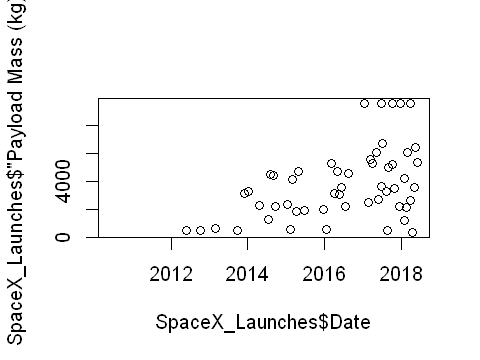

In [9]:
plot(SpaceX_Launches$Date,SpaceX_Launches$'Payload Mass (kg)')

As time goes on, SpaceX seems to have launched heavier and heavier rockets. Interesting!  
But let's not forget what we're here for - we want to look at the levels of ozone and compare them to rocket launch dates. So the first thing is to look at our ozone data. This time, the data is in folders that contain information on different types of gases. It'll be easier to download the data and import it by referencing the file. To do this easily...
1. Make a folder for your data to be in.

 *Name this folder something like 'Workshop Working Directory'.*
 
 
2. Extract the data into that folder.

 *Use a program like WinRAR (Windows) or the Archine Utility (Mac).*


3. Set that folder as your Working Directory.

 *To do this, use the setwd() function. If you're in RStudio, go to Session > Set Working Directory > Browse and browse to the folder.*

Take note: to use the setwd() function in Windows, the file path should contain double forward slashes instead of back slashes.

In [10]:
setwd('C://Users//Michal//Documents//2019//STEM//Workshop//Working Directory')

If you go to your working directoy folder, you'll see 'The Four Gases in Cohorts' has been extracted into a folder. Clicking on this takes you to... four more folders, each with the name of a different gas - Carbon Dioxide, Nitrogen Dioxide, Ozone, and Sulfur Dioxide. Clicking on the Ozone folder, you get a bunch of .csv files! There's way too many to work with. Luckily, each file corresponds to data in three-year intervals. To find out what data we should import, we can check to see the years the most common launches occured in.

To do this, we can use the sort() and the table () functions on the Date coloumn.

In [11]:
sort(table(as.numeric(format(as.Date(SpaceX_Launches$Date), '%Y'))),decreasing=TRUE)


2017 2018 2016 2015 2014 2013 2010 2012 
  18   11    8    7    6    3    2    2 

Conveniently (and somewhat predictably), the three years with the most flights are the three latest consecutive ones - 2016, 2017, and 2018. So, we can safely import the ozone data from years 2016-2018. Let's save it in a variable called Ozone_Data.

In [12]:
Ozone_Data<-read_csv('The Four Gases in Cohorts//Ozone//Ozone levels from 2016 to 2018.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  State.Code = col_integer(),
  County.Code = col_integer(),
  Site.Num = col_integer(),
  Parameter.Code = col_integer(),
  POC = col_integer(),
  Latitude = col_double(),
  Longitude = col_double(),
  Date.Local = col_date(format = ""),
  Observation.Count = col_integer(),
  Observation.Percent = col_integer(),
  Arithmetic.Mean = col_double(),
  X1st.Max.Value = col_double(),
  X1st.Max.Hour = col_integer(),
  AQI = col_integer(),
  Date.of.Last.Change = col_date(format = "")
)
See spec(...) for full column specifications.


Fantastic! It seems that all the coloumns have been parsed. To take a peak at our data, we can use the **head()** function.

In [13]:
head(Ozone_Data)

State.Code County.Code Site.Num Parameter.Code POC Latitude Longitude Datum
1 1          3           10       44201          1   30.49748 -87.88026 NAD83
2 1          3           10       44201          1   30.49748 -87.88026 NAD83
3 1          3           10       44201          1   30.49748 -87.88026 NAD83
4 1          3           10       44201          1   30.49748 -87.88026 NAD83
5 1          3           10       44201          1   30.49748 -87.88026 NAD83
6 1          3           10       44201          1   30.49748 -87.88026 NAD83
  Parameter.Name Sample.Duration         ... AQI Method.Code Method.Name
1 Ozone          8-HR RUN AVG BEGIN HOUR ... 37  NA          -          
2 Ozone          8-HR RUN AVG BEGIN HOUR ... 36  NA          -          
3 Ozone          8-HR RUN AVG BEGIN HOUR ... 39  NA          -          
4 Ozone          8-HR RUN AVG BEGIN HOUR ... 36  NA          -          
5 Ozone          8-HR RUN AVG BEGIN HOUR ... 44  NA          -          
6 Ozone          8-HR RUN AVG BEGIN HOUR ... 44  NA          -          
  Local.Site.Name   Address                                                 
1 FAIRHOPE, Alabama FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA
2 FAIRHOPE, Alabama FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA
3 FAIRHOPE, Alabama FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA
4 FAIRHOPE, Alabama FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA
5 FAIRHOPE, Alabama FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA
6 FAIRHOPE, Alabama FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA
  State.Name County.Name City.Name CBSA.Name                
1 Alabama    Baldwin     Fairhope  Daphne-Fairhope-Foley, AL
2 Alabama    Baldwin     Fairhope  Daphne-Fairhope-Foley, AL
3 Alabama    Baldwin     Fairhope  Daphne-Fairhope-Foley, AL
4 Alabama    Baldwin     Fairhope  Daphne-Fairhope-Foley, AL
5 Alabama    Baldwin     Fairhope  Daphne-Fairhope-Foley, AL
6 Alabama    Baldwin     Fairhope  Daphne-Fairhope-Foley, AL
  Date.of.Last.Change
1 2017-01-04         
2 2017-01-04         
3 2017-01-04         
4 2017-01-04         
5 2017-01-04         
6 2017-01-04

There seems to be a lot of coloumns - in fact, there's a '...', representing that the head() function skipped a few coloumns when showing the first six rows. This happens to datasets with a large number of coloumns.

To further our investigation, we can check the number of rows and the number of coloumns our dataset has with the **nrow()** and the **ncol()** functions respectively.

In [14]:
nrow(Ozone_Data)
ncol(Ozone_Data)

[1] 839893

[1] 29

That's a lot of coloumns! It's very unlikely that all of them are going to be useful to us. To check out the names of these coloumns, including the 'hidden' ones that the head() function isn't showing us, we can use the **names()** function.

In [15]:
names(Ozone_Data)

[1] "State.Code"          "County.Code"         "Site.Num"           
 [4] "Parameter.Code"      "POC"                 "Latitude"           
 [7] "Longitude"           "Datum"               "Parameter.Name"     
[10] "Sample.Duration"     "Pollutant.Standard"  "Date.Local"         
[13] "Units.of.Measure"    "Event.Type"          "Observation.Count"  
[16] "Observation.Percent" "Arithmetic.Mean"     "X1st.Max.Value"     
[19] "X1st.Max.Hour"       "AQI"                 "Method.Code"        
[22] "Method.Name"         "Local.Site.Name"     "Address"            
[25] "State.Name"          "County.Name"         "City.Name"          
[28] "CBSA.Name"           "Date.of.Last.Change"

How do we decide what stays and what we should keep? There seem to be an endless amount of choices! One way to lessen the load is to take a look at the **Readme** file for this dataset. The Readme file can be found [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_daily_summary_files).

Reading it, it seems we want to keep location info, time info, and info the best summarizes the measurement of the day.

**Location Data**  
Things like 'Address' or 'City Name' might actually give us too much information, or information not easily worked with, so let's keep Longitude and Latitude. This is numeric data that is easier to quanitfy.
As well, the Readme file describes the Site.Num coloumn as _a unique number within the county identifying the site_, which could also be useful in singling out sites!
Lastly, to have something left to more easily compare the SpaceX Launch data, we'll leave in County data.

_Let's keep Site.Num, Latitude, Longitude, and County._

**Time Data**  
For this, we'll take the local date. Remember, this is the date according to local measurements, so we'd have to consider this if we want to work with timezones.

_Let's keep Date.Local._

**Measurements**  
There's a load of data here, but generally we can keep the measurements for the Arithmetic Mean of the ozone concentration, the units of measurements they're in (in case we have to convert) and, for the sake of investigation and interest, we can keep the Air Quality Index to compare the effect of ozone concentration.

_Let's keep Arithmetic.Mean and AQI._

In [16]:
Ozone_Data<-Ozone_Data[c('Site.Num', 'Latitude', 'Longitude', 'Date.Local', 'Units.of.Measure', 'Arithmetic.Mean', 'AQI', 'County.Name')]
head(Ozone_Data)

Site.Num Latitude Longitude Date.Local Units.of.Measure  Arithmetic.Mean AQI
1 10       30.49748 -87.88026 2016-03-01 Parts per million 0.034273        37 
2 10       30.49748 -87.88026 2016-03-02 Parts per million 0.025294        36 
3 10       30.49748 -87.88026 2016-03-03 Parts per million 0.033353        39 
4 10       30.49748 -87.88026 2016-03-04 Parts per million 0.030059        36 
5 10       30.49748 -87.88026 2016-03-05 Parts per million 0.032176        44 
6 10       30.49748 -87.88026 2016-03-06 Parts per million 0.030000        44 
  County.Name
1 Baldwin    
2 Baldwin    
3 Baldwin    
4 Baldwin    
5 Baldwin    
6 Baldwin

Excellent! Let's take a look at a variable more closely, the one in the fifth coloumn: Units of Measure. This will give us an indictation of any unit conversions that we might need to do. Using the **unique()** function, we can find all the unique units of measurement, and then choose one to convert all the others to.

In [17]:
unique(Ozone_Data$Units.of.Measure)

[1] "Parts per million"

How convenient! No unit conversions are necessary. As such, we can simply make a note of our units and get rid of this coloumn. Before we do that, however, why not investigate if we can get rid of any other coloumns?

What about the 'Site Num' variable that we mentioned before? If every measurement location had a unique number, when doing things like merging datasets would be a lot easier, because we have a identifier! To verify that each location has a unique site number attached to it, we can take the number of unique sites using the **length()** and **unique()** functions and subtract from it the number of unique Latitude measurements. If Site Num and location are perfectly related, we should expect a difference of 0, or perhaps 1 or -1 to account for some error.

In [18]:
length(unique(Ozone_Data$Site.Num))-length(unique(Ozone_Data$Latitude))

[1] -1030

Whoa - this is way crazier than 0! Either the Site Num variable isn't perfectly related to location, or there is some sort of grouping going on. In either case, the Site Num variable isn't doing what we want it to do. Both this coloumn and the Unites of Measurements coloumn can safely be removed. To do so, we should take the coloumn number of these variables and simply use a **negative index**.

In [19]:
Ozone_Data<-Ozone_Data[-c(1, 5)]
head(Ozone_Data)

Latitude Longitude Date.Local Arithmetic.Mean AQI County.Name
1 30.49748 -87.88026 2016-03-01 0.034273        37  Baldwin    
2 30.49748 -87.88026 2016-03-02 0.025294        36  Baldwin    
3 30.49748 -87.88026 2016-03-03 0.033353        39  Baldwin    
4 30.49748 -87.88026 2016-03-04 0.030059        36  Baldwin    
5 30.49748 -87.88026 2016-03-05 0.032176        44  Baldwin    
6 30.49748 -87.88026 2016-03-06 0.030000        44  Baldwin

Voilà: a sleek dataset. Perhaps to make it a little easier to reference, we can change 'County.Name' to just 'County'. We can do this by using the **names()** function.

In [20]:
names(Ozone_Data)[6]<-'County'

Excellent! Now that that is done, we can take a look at a summarized version of our data using the function **summary()**.

In [21]:
summary(Ozone_Data)

    Latitude       Longitude         Date.Local         Arithmetic.Mean    
 Min.   :18.18   Min.   :-158.09   Min.   :2016-01-01   Min.   :-0.000647  
 1st Qu.:34.09   1st Qu.:-110.60   1st Qu.:2016-07-15   1st Qu.: 0.024294  
 Median :38.34   Median : -92.01   Median :2017-01-29   Median : 0.032000  
 Mean   :37.62   Mean   : -95.47   Mean   :2017-01-22   Mean   : 0.032082  
 3rd Qu.:41.00   3rd Qu.: -82.13   3rd Qu.:2017-07-26   3rd Qu.: 0.039529  
 Max.   :64.85   Max.   : -65.92   Max.   :2018-05-13   Max.   : 0.105176  
      AQI            County         
 Min.   :  0.00   Length:839893     
 1st Qu.: 31.00   Class :character  
 Median : 37.00   Mode  :character  
 Mean   : 39.85                     
 3rd Qu.: 44.00                     
 Max.   :233.00                     

Here we can see a few useful tips about our data, including that its latest entry (at the time that this workshop is published) is in May 13th of 2018. There also seems to be a day where the Air Quality Index is 0... which doesn't seem all that likely. Most strangely, we see that there are days where the arithmetic mean of the measurements is... negative? That doesn't seem right. Perhaps it would pay off to take a closer look at these negative outliers. We can do this by using a **conditional index**.

In [22]:
outliers<-Ozone_Data[Ozone_Data$Arithmetic.Mean<0,]

Let's take a look using the head() function.

In [23]:
head(outliers)

Latitude Longitude Date.Local Arithmetic.Mean AQI County 
1 41.20796 -95.9459  2017-10-05 -0.000647       0   Douglas

Thankfully, there is only one. Note that the AQI in this case is 0 as well - another abnormality we noted earier. In this case, we can usually delete the entry without a problem.

In [24]:
Ozone_Data<-Ozone_Data[-Ozone_Data$Arithmetic.Mean<0,]

Let's take a look at the summary, sans weird outliers.

In [25]:
summary(Ozone_Data)

    Latitude       Longitude         Date.Local         Arithmetic.Mean   
 Min.   :18.18   Min.   :-158.09   Min.   :2016-01-01   Min.   :0.000059  
 1st Qu.:34.10   1st Qu.:-110.60   1st Qu.:2016-07-15   1st Qu.:0.024353  
 Median :38.34   Median : -92.01   Median :2017-01-29   Median :0.032000  
 Mean   :37.62   Mean   : -95.47   Mean   :2017-01-22   Mean   :0.032103  
 3rd Qu.:41.00   3rd Qu.: -82.13   3rd Qu.:2017-07-25   3rd Qu.:0.039529  
 Max.   :64.85   Max.   : -65.92   Max.   :2018-05-13   Max.   :0.105176  
      AQI            County         
 Min.   :  1.00   Length:839357     
 1st Qu.: 31.00   Class :character  
 Median : 37.00   Mode  :character  
 Mean   : 39.88                     
 3rd Qu.: 44.00                     
 Max.   :233.00                     

Splendid - the Arithmetic Mean is back to reasonable results, and now the minimum AQI is 1!

What about some parameters? Let's take a look at the standard deviation of our ozone measurements.

In [26]:
sd(Ozone_Data$Arithmetic.Mean)

[1] 0.01106837

A standard deviation of 0.011 parts per million, and the mean is 0.032 parts per million. But what does that mean? What kind of distribution does this data follow? It may be more useful to use data visualization here.

Let's make a histogram usig the **hist()** function.

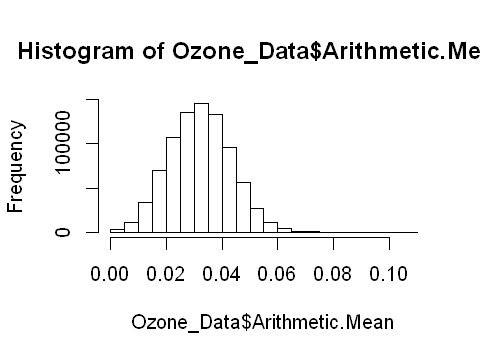

In [27]:
hist(Ozone_Data$Arithmetic.Mean)

Aha! This *does* seem to be a normal distribution. To highlight this, let's add a line using the **lines()** function. Let's colour it red and add a smoothing of 3. You can play around with these parameters yourself to see how it affects the line.

Note that we should convert to a probability histogram to make this lines() function work. To do so, simply put prob=TRUE in your hist() function.

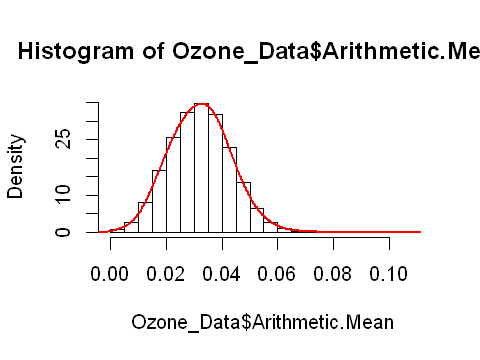

In [28]:
hist(Ozone_Data$Arithmetic.Mean, prob=TRUE)
lines(density(Ozone_Data$Arithmetic.Mean, adjust=3), col="red", lwd=2) 

Yet another simple thing we can ask is if there is a correlation between ozone levels and the Air Quality Index. We expect there to be one, since ozone levels play a direct role in the calculation of the air quality index, as well as other gases. As such, we expect there to be a **strong, positive correlation**. We can verify this using the **cor()** function.

In [29]:
cor(Ozone_Data$Arithmetic.Mean, Ozone_Data$AQI)

[1] 0.8012037

And indeed we get what we expected!

Now, while the Ozone Levels dataset on its own is proving to be rather interesting, our goal lies in investigating it side by side to our SpaceX Launches dataset. One way we can do this is geographically... however, the SpaceX Launches don't have Longitude and Latitude data. Even if they did, the launches at those sites would affect a range of different readings, not just the ones of the air stations close to them.

Looking back at our Ozone Data coloumns, we see that we have a County variable. Aha! That seems like a reasonable thing to use as a location identifier. The first thing we should do is take a look at the launch sites. We'll use the unique() function.

In [30]:
unique(SpaceX_Launches$'Launch Site')

[1] "CCAFS LC-40"  "VAFB SLC-4E"  "KSC LC-39A"   "CCAFS SLC-40"

There are only three sites here! In order to link our datasets geographically, we can find out what counties these sites are in and then create a new coloumn. We're lucky - because there are only four sites, we can google where each of them are.

CCAFS LC-40 - Brevard County, Florida
VAFB SLC-4E - Santa Barbara County, California
KSC LC-39A - Brevard County, Flordia
CCAFS SLC-40 - Brevard County, Flordia

Wow, we're in luck! Only VAFB SLC-4E is in Santa Barbara; the others are in Brevard. How do we add this property to our dataset? We can add another coloumn which depends on the Launch Site variable - if the value for that row is 'VAFB SLC-4E', we'll put 'Santa Barbara' in our new coloumn for that row. Otherwise, we'll put in 'Brevard'.

We can acheieve this by using the **transform()** and the **ifelse()** functions.

In [31]:
SpaceX_Launches<-transform(SpaceX_Launches, County=ifelse(SpaceX_Launches$'Launch Site'=='VAFB SLC-4E', 
                                         'Santa Barbara', 
                                         'Brevard'
                                        ))

Let's take a look at our SpaceX Launches dataset, now with the County coloumn.

In [32]:
head(SpaceX_Launches)

Flight.Number Date       Time..UTC. Booster.Version Launch.Site
1 1             2010-06-04 18:45:00   F9 v1.0  B0003  CCAFS LC-40
2 2             2010-12-08 15:43:00   F9 v1.0  B0004  CCAFS LC-40
3 3             2012-05-22 07:44:00   F9 v1.0  B0005  CCAFS LC-40
4 4             2012-10-08 00:35:00   F9 v1.0  B0006  CCAFS LC-40
5 5             2013-03-01 15:10:00   F9 v1.0  B0007  CCAFS LC-40
6 6             2013-09-29 16:00:00   F9 v1.1  B1003  VAFB SLC-4E
  Payload                                                       
1 Dragon Spacecraft Qualification Unit                          
2 Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese
3 Dragon demo flight C2+                                        
4 SpaceX CRS-1                                                  
5 SpaceX CRS-2                                                  
6 CASSIOPE                                                      
  Payload.Mass..kg. Orbit     Customer        Mission.Outcome
1  NA               LEO       SpaceX          Success        
2  NA               LEO (ISS) NASA (COTS) NRO Success        
3 525               LEO (ISS) NASA (COTS)     Success        
4 500               LEO (ISS) NASA (CRS)      Success        
5 677               LEO (ISS) NASA (CRS)      Success        
6 500               Polar LEO MDA             Success        
  Landing.Outcome       County       
1 Failure   (parachute) Brevard      
2 Failure   (parachute) Brevard      
3 No attempt            Brevard      
4 No attempt            Brevard      
5 No attempt            Brevard      
6 Uncontrolled (ocean)  Santa Barbara

Perfect! 

Now that we've prepped our SpaceX Launch dataset, we should turn our attention to cleaning up the Ozone Data. For one, we can change the name of the third coloumn to a much easier to type 'Date'. 

In [33]:
names(Ozone_Data)[3]<-'Date'

As well, we can **subset** our data by county using conditional indices. Let's call the two subsetted datasets 'SB_Ozone', for 'Santa Barbara Ozone', and 'Brevard_Ozone' for the same reason.

In [34]:
SB_Ozone<-Ozone_Data[Ozone_Data$County=='Santa Barbara',]
Brevard_Ozone<-Ozone_Data[Ozone_Data$County=='Brevard',]

Since most of the stations are in Brevard, let's take a closer look at the Brevard Ozone data.

In [35]:
head(Brevard_Ozone)

Latitude Longitude Date       Arithmetic.Mean AQI County 
1 28.05361 -80.62861 2016-01-01 0.021706        24  Brevard
2 28.05361 -80.62861 2016-01-02 0.023471        25  Brevard
3 28.05361 -80.62861 2016-01-03 0.024294        24  Brevard
4 28.05361 -80.62861 2016-01-04 0.035824        36  Brevard
5 28.05361 -80.62861 2016-01-05 0.042235        40  Brevard
6 28.05361 -80.62861 2016-01-06 0.036824        39  Brevard

Similarly, we can do the same thing for SpaceX Launch data, subsetting by county with conditional indices.

In [36]:
Brevard_Launches<-SpaceX_Launches[SpaceX_Launches$County=='Brevard',]
SB_Launches<-SpaceX_Launches[SpaceX_Launches$County=='Santa Barbara',]

Great! Now, we can look further into **data visualization**. For this, we can use a package called **tidyverse**, which in it contains **ggplot2**, a very useful graphing library.

In [37]:
install.packages("tidyverse", dependencies=TRUE, repos='http://cran.utstat.utoronto.ca/')
install.packages("bindrcpp", dependencies=TRUE, repos='http://cran.utstat.utoronto.ca/')
library(tidyverse)
library(ggplot2)

Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michal\AppData\Local\Temp\RtmpyuFQK5\downloaded_packages


Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'bindrcpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michal\AppData\Local\Temp\RtmpyuFQK5\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.1     v stringr 1.2.0
v ggplot2 3.0.0     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Let's make our first ggplot using the entire Ozone Dataset to see if we can glimpse any particularly interesting trends over time. As sunch, we wat our date on the x axis and the arithmetic mean of our ozone measurements on the y axis. We can plot this with a line graph.

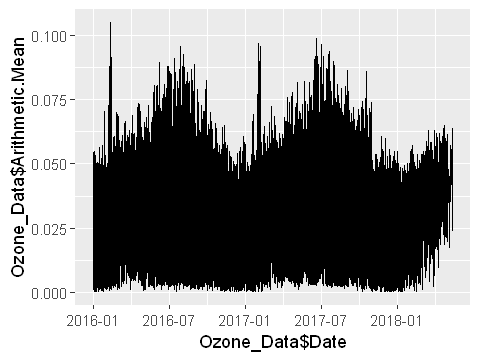

In [39]:
ggplot(data=Ozone_Data, aes(x=Ozone_Data$Date, y=Ozone_Data$'Arithmetic.Mean')) + 
geom_line()

 
##Note that I wrote geom_line() on a different line. This makes layers easier to keep track of.
##You can do this as long as the line does not begin with a '+'.

Whoa! That's very... solid. It seems that for the same day there are multiple measurements. This makes sense, as there are many sites all over the United States recording data at any given time. We can clean this up by **aggregating** the arithmetic mean of the measurements by their date and taking the average of all of them. We can do this using the **aggregate()** function.

So as not to alter our original (cleaned) data, let's put this into a new variable called 'agg_Ozone'.

In [40]:
agg_Ozone<-aggregate(Arithmetic.Mean~Date, Ozone_Data, mean)

Now let's plot the data from agg_Ozone using the same metrics as before.

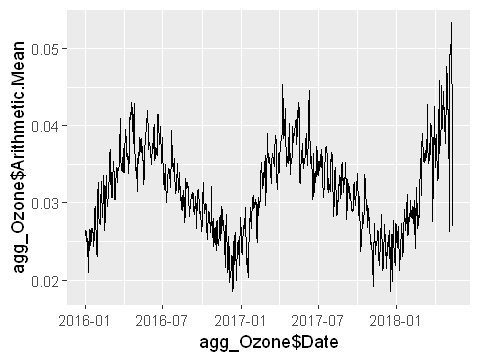

In [41]:
ggplot(data=agg_Ozone, aes(x=agg_Ozone$Date, y=agg_Ozone$'Arithmetic.Mean')) + 
geom_line()

Much better! Now this pattern emerges much more clearly. It seems that, as a generalization to the entire United States, the ozone levels in the air feature a fall-and-rise pattern similar to a sinusoidal curve. The peaks seem to be in the late spring and the troughs in mid-winter.

Let's illustrate this trend more clearly using the smooth geom.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


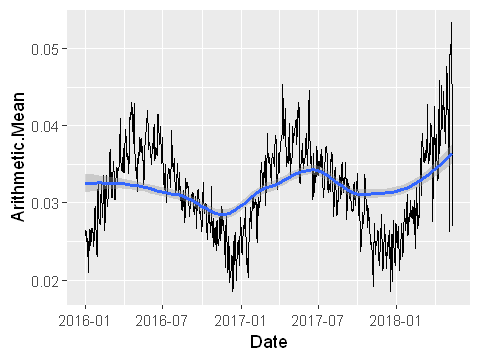

In [42]:
ggplot(data=agg_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth()

Not exactly perfect, but still interesting! It's possible our results would be better modeled if we can look at each year independently. We can do this while retaining a side-by-side comparison ability using **facets**.

Our **facet_wrap()** function should accept a year metric, which we can extract from the Date variable by using **format()** and **as.Date()**. Additionally, I have set the number of coloumns in the facet to be equal to 1; you can play around with this and see if other configurations suit you better.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


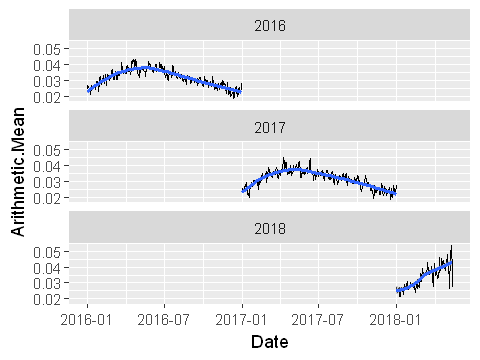

In [43]:
ggplot(data=agg_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth() +
facet_wrap(~format(as.Date(Date, "Y/%M/%D"), '%Y'), ncol=1)

The individual years fit a model more elegantly. However, it could be useful to zoom in on these for a paper or presentation. To make our ggplots interactive, we'll use the **plotly** library.

In [44]:
install.packages('plotly', repos='http://cran.r-project.org')
library(plotly)

Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michal\AppData\Local\Temp\RtmpyuFQK5\downloaded_packages



Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



Let's save the faceted ggplot visualization in a variable called myPlot.  
*If you're in a terminal, you can press the UP arrow key to bring back your most recent command.*

In [45]:
myPlot<-ggplot(data=agg_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth() +
facet_wrap(~format(as.Date(Date, "Y/%M/%D"), '%Y'), ncol=1)

And the **ggplotly()** function will make this graph interactive for us!

In [46]:
ggplotly(myPlot)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


HTML widgets cannot be represented in plain text (need html)

So now that we have some idea of our measurements over time, let's investigate *where* our data is coming from. We have longitude and latitude, as well as county information, but that doesn't communicate where these groups are or tell us anything particularly intuitively.

To work with geographic data, let's install the **ggmap** package.

In [47]:
install.packages("ggmap", repos='http://cran.r-project.org', force=TRUE)
library("ggmap")

Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)

Attaching package: 'ggmap'

The following object is masked from 'package:plotly':

    wind



Since we know our data is from the USA, we can pass that into the **get_map()** function.  
For this workshop, set the zoom to 4. You can play around with this to see how it alters your visualization.

Let's save the map into a variable called myMap.

In [48]:
myMap<-get_map(location='United States',zoom=4)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=United+States&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false


We can now use the **ggmap()** function to bring up our map.

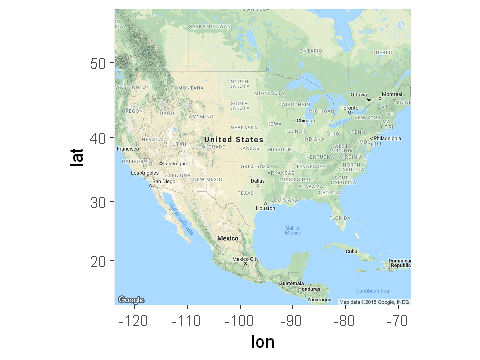

In [49]:
ggmap(myMap)

Here we are!

Adding points to the map is as easy as using the point geom, as we would for normal ggplot objects. Set x as our Longitude and y as our Latitude.

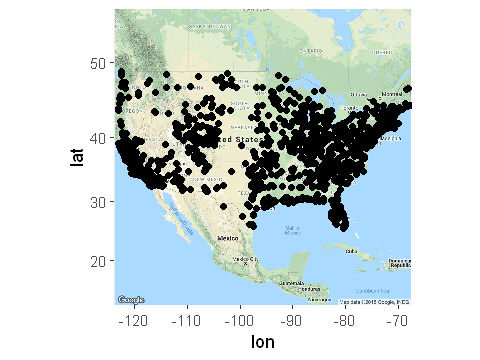

In [50]:
ggmap(myMap)+
geom_point(data=Ozone_Data, aes(x=Longitude, y=Latitude))

Interesting!

For analysis purposes, we might want to split these data points off into groups, or sections that clump together. We could vaguely see what these clumps might look like in the image above.

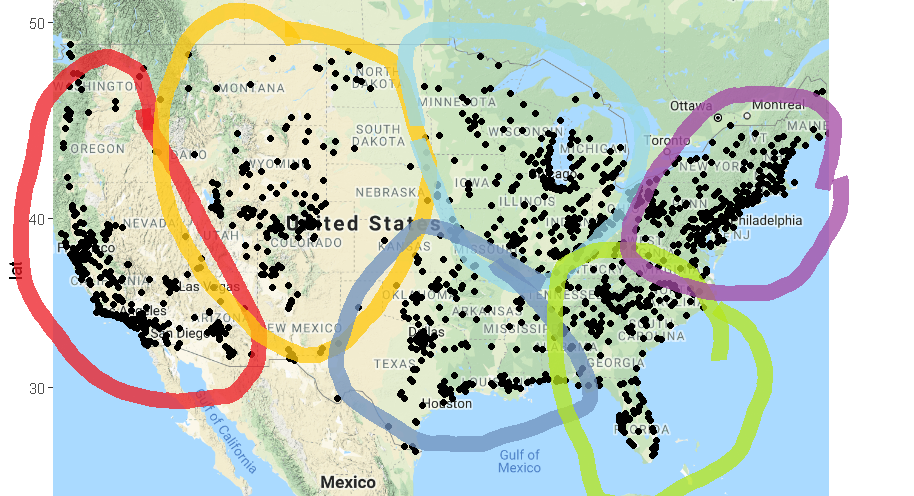

We're looking for roughly six 'clumps'. Ideally, we could add another coloumn to our dataset which contains a number identifying which cluster that particular datapoint belongs to. 

A great way to do this is to **cluster** our data! We can use the built-in **k-means clustering algorithm** in R to help us do so. Let's save the results from the **kmeans()** function into a variable called clusters.

In [51]:
set.seed(42)

In [52]:
clusters<-kmeans(Ozone_Data[c('Longitude', 'Latitude')], 6)

'clusters' has many different aspects. To find out which one we are looking for, let's use the names() function.

In [53]:
names(clusters)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

'cluster' seems promising! We want the vector to contain a huge amount of rows, each with one of six numbers. We can find how many entries there are using the length() function and what kind of entries there are with the unique() function.

In [54]:
length(clusters$cluster)
unique(clusters$cluster)

[1] 839357

[1] 5 6 1 4 3 2

Aaannd perfect! We can now put 'clusters$cluster' into our dataframe.

In [55]:
Ozone_Data[ncol(Ozone_Data)+1]<-clusters$cluster

Taking a look at our dataset now, we can see we have a new coloumn that identifies which cluster the datapoint belongs to.

In [56]:
head(Ozone_Data)

Latitude Longitude Date       Arithmetic.Mean AQI County  V7
1 30.49748 -87.88026 2016-03-01 0.034273        37  Baldwin 5 
2 30.49748 -87.88026 2016-03-02 0.025294        36  Baldwin 5 
3 30.49748 -87.88026 2016-03-03 0.033353        39  Baldwin 5 
4 30.49748 -87.88026 2016-03-04 0.030059        36  Baldwin 5 
5 30.49748 -87.88026 2016-03-05 0.032176        44  Baldwin 5 
6 30.49748 -87.88026 2016-03-06 0.030000        44  Baldwin 5

Let's call this coloumn the 'zone' of the data.

In [57]:
names(Ozone_Data)[7]<-'Zone'

Since we want our zones to be different colours, we can pass in the Zone as the colour aesthetic. However, since Zone is a number, the colours will more than likely automatically form a gradient to highlight our continuous data. We can get around this by simply passing in the Zone coloumn as character data.

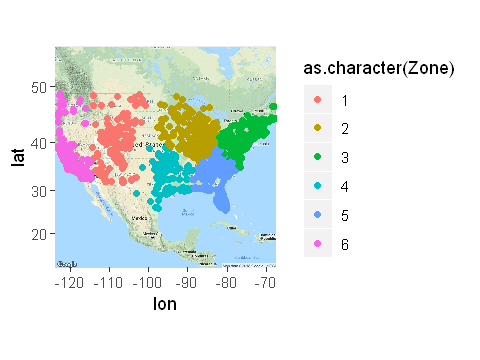

In [58]:
ggmap(myMap)+
geom_point(data=Ozone_Data, aes(x=Longitude, y=Latitude, col=as.character(Zone)))

Voilà! That's our investigation into geographical data done. Now, let's turn our attention back to ozone data, this time specifically narrowing down our focus to Brevard County.

Once more, a **time-series** plot of the ozone in Brevard County is a useful visualization. We can add in a smooth geom for a trendline.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


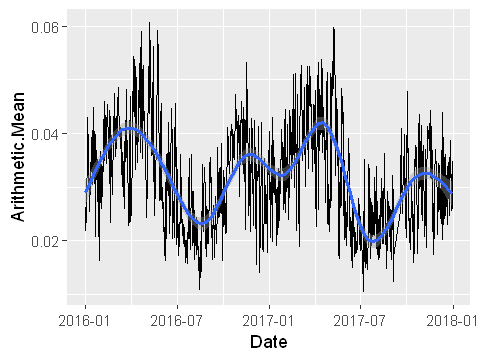

In [59]:
ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth()

There are a few dates in which there are multiple measurements. As before, we can get around this by aggregating by date.

In [60]:
Brevard_Ozone<-(aggregate(Arithmetic.Mean~Date, Brevard_Ozone, mean))

Additionally, the trendline we picked before is interesting, but we can change it to a linear one by changing the 'method' argument in the smooth geom to 'lm'.

Let's investigate our aggregated data with a linear model.

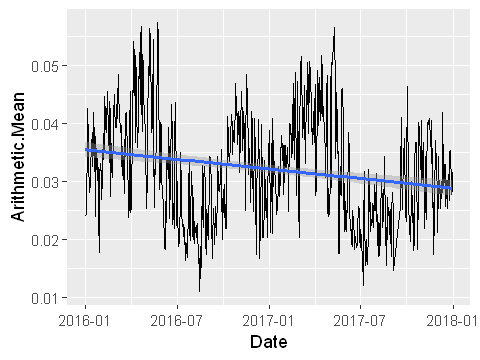

In [61]:
ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth(method='lm')

A slight decrease - interesting, but given the 'breathing' nature of our gas, probably largely insignficant.

Now, to get down to the meat of our investigation, we can finally combine the SpaceX and the Ozone Datasets. Let's **merge** the two Brevard datasets by Date using the **merge()** function. Let's call our resulting dataset 'Brev_Ozone_Launch'.

In [62]:
Brev_Ozone_Launch<-merge(Brevard_Ozone, Brevard_Launches, by='Date')
head(Brev_Ozone_Launch)

Date       Arithmetic.Mean Flight.Number Time..UTC. Booster.Version
1 2016-03-04 0.0460000       22            23:35:00   F9 FT B1020    
2 2016-04-08 0.0526180       23            20:43:00   F9 FT B1021.1  
3 2016-05-06 0.0498530       24            05:21:00   F9 FT B1022    
4 2016-05-27 0.0343820       25            21:39:00   F9 FT B1023.1  
5 2016-06-15 0.0329705       26            14:29:00   F9 FT B1024    
6 2016-07-18 0.0163825       27            04:45:00   F9 FT B1025.1  
  Launch.Site Payload                    Payload.Mass..kg. Orbit    
1 CCAFS LC-40 SES-9                      5271              GTO      
2 CCAFS LC-40 SpaceX CRS-8               3136              LEO (ISS)
3 CCAFS LC-40 JCSAT-14                   4696              GTO      
4 CCAFS LC-40 Thaicom 8                  3100              GTO      
5 CCAFS LC-40 ABS-2A Eutelsat 117 West B 3600              GTO      
6 CCAFS LC-40 SpaceX CRS-9               2257              LEO (ISS)
  Customer               Mission.Outcome Landing.Outcome       County 
1 SES                    Success         Failure (drone ship)  Brevard
2 NASA (CRS)             Success         Success  (drone ship) Brevard
3 SKY Perfect JSAT Group Success         Success (drone ship)  Brevard
4 Thaicom                Success         Success  (drone ship) Brevard
5 ABS Eutelsat           Success         Failure  (drone ship) Brevard
6 NASA (CRS)             Success         Success (ground pad)  Brevard

Excellent! Now, a really nifty thing would be to mark the launches on our graph with a point and label the Payload name to investigate the effect on the ozone immediately after the launch.

We can do this using **geom_vline()**, **geom_label()**, and of course **geom_point()**.

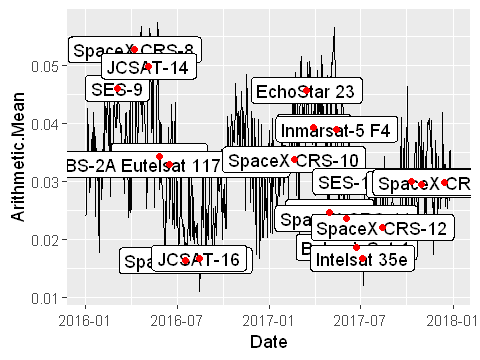

In [63]:
ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_label(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean, label=Payload)) +
geom_point(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean, label=Payload), col='red')

The trouble here is that the labels are blocking each other everything! Luckily, we can use another package to clear the labels out of the way - ggrepel.

In [64]:
install.packages("ggrepel", repos='http://cran.utstat.utoronto.ca/')
library(ggrepel)

Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michal\AppData\Local\Temp\RtmpyuFQK5\downloaded_packages


We could simply replace geom_label() with geom_label_repel(). Let's save the resulting ggplot into a variable called myPlot2.

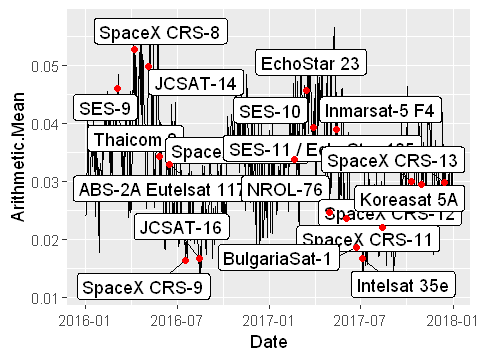

In [65]:
myPlot2<-ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() +
geom_label_repel(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean, label=Payload)) +
geom_point(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean), col='red')
myPlot2

Let's make this plot interactive! Unforunately, this means that the labels will no longer show.

In [66]:
ggplotly(myPlot2)

HTML widgets cannot be represented in plain text (need html)

Feel free to investigate at your leisure. You'll find in some cases, there is a decrease, in others there is an increase, and what's more the severity of the increases and decreases varies too! However, overall, it seems that there is a decrease after the majority of launches...

So is it safe to say that SpaceX Launches *do* cause a decrease in ozone? Not really. It seems we might want to take a closer look time-wise. Conveniently, we already have ozone data in hourly format! Let's import it now for the Brevard County.

The link to the dataset can be found [here](https://drive.google.com/file/d/1rQ4I1kzb519QE641oNLLAR2di56e_fcK/view?usp=sharing).

In [67]:
Brevard_Hourly<-read_csv('2017 Hourly Brevard Data.csv')
head(Brevard_Hourly)

Parsed with column specification:
cols(
  Latitude = col_double(),
  Longitude = col_double(),
  `Local Datetime (EDT)` = col_character(),
  `Sample Measurement (ppm)` = col_double()
)


Latitude Longitude Local Datetime (EDT) Sample Measurement (ppm)
1 28.05361 -80.62861 2017-01-01 5:00      0.007                   
2 28.31084 -80.61533 2017-01-01 5:00      0.032                   
3 28.05361 -80.62861 2017-01-01 6:00      0.006                   
4 28.31084 -80.61533 2017-01-01 6:00      0.026                   
5 28.05361 -80.62861 2017-01-01 7:00      0.002                   
6 28.31084 -80.61533 2017-01-01 7:00      0.023

Hmm... what an interesting dataset! Note that our Sample Measurement is in parts per million, and that our **datetime** variable is taken in EDT.

Let's look at a summary of our data.

In [68]:
summary(Brevard_Hourly)

    Latitude       Longitude      Local Datetime (EDT) Sample Measurement (ppm)
 Min.   :28.05   Min.   :-80.63   Length:16285         Min.   :0.0000          
 1st Qu.:28.05   1st Qu.:-80.63   Class :character     1st Qu.:0.0210          
 Median :28.05   Median :-80.63   Mode  :character     Median :0.0300          
 Mean   :28.18   Mean   :-80.62                        Mean   :0.0305          
 3rd Qu.:28.31   3rd Qu.:-80.62                        3rd Qu.:0.0390          
 Max.   :28.31   Max.   :-80.62                        Max.   :0.0750          
 NA's   :10      NA's   :10                            NA's   :10              

There doesn't seem to be anything too out of the ordinary here - however, our datetime variable is a character! We can verify this using the **class()** function.

In [69]:
class(Brevard_Hourly$'Local Datetime (EDT)')

[1] "character"

We can **coerce** this dataset into the **POSIXct** format for datetimes.

To do this, we'll use the **strptime()** and **as.POSIXct()** functions.

In [70]:
Brevard_Hourly$'Local Datetime (EDT)'<-as.POSIXct(strptime(Brevard_Hourly$'Local Datetime (EDT)', format="%Y-%m-%d %H:%M"))

Now when we take the summary of our hourly dataset, we can have a more in-depth look into our datetime variable.

In [71]:
summary(Brevard_Hourly)

    Latitude       Longitude      Local Datetime (EDT)         
 Min.   :28.05   Min.   :-80.63   Min.   :2017-01-01 05:00:00  
 1st Qu.:28.05   1st Qu.:-80.63   1st Qu.:2017-03-28 08:00:00  
 Median :28.05   Median :-80.63   Median :2017-06-21 19:00:00  
 Mean   :28.18   Mean   :-80.62   Mean   :2017-06-26 12:38:02  
 3rd Qu.:28.31   3rd Qu.:-80.62   3rd Qu.:2017-10-01 01:00:00  
 Max.   :28.31   Max.   :-80.62   Max.   :2017-12-31 23:00:00  
 NA's   :10      NA's   :10       NA's   :12                   
 Sample Measurement (ppm)
 Min.   :0.0000          
 1st Qu.:0.0210          
 Median :0.0300          
 Mean   :0.0305          
 3rd Qu.:0.0390          
 Max.   :0.0750          
 NA's   :10              

Since all our dates are in 2017, we'll want to take all the launches that occured in Brevard in 2017 for our comparison. We can do this using conditional indices - let's put it into a variable called Launches17.

In [72]:
Launches17<-Brevard_Launches[format(as.Date(Brevard_Launches$Date, "Y/%M/%D"), '%Y')=='2017',]

Out of curiosity, how many launches are we talking about? Using nrow() gives us our answer.

In [73]:
nrow(Launches17)

[1] 13

Let's make the Datetime and Measurement coloumns of our Brevard Hourly Ozone data easier to access by shortening the coloumn names.

In [74]:
names(Brevard_Hourly)[c(3,4)]<-c('Datetime', 'Measurement')

Now, an interesting problem arises. Our launch data is in UTC, but our Ozone Data is in EDT. How can we reconcile this?

Additionally, our launch data (Launches17) contains the date and the time in seperate coloumns. Our first step, therefore, is to make a datetime coloumn in our launch dataset.

Let's create a new coloumn using transform() by binding the date and the time coloumns with **paste()**. Since paste() works on characters, we should use **as.character()** to coerce our data into the character data type.

In [75]:
Launches17<-transform(Launches17, Datetime=as.character(paste(Date, Time..UTC.)))

Our next step is to convert the coloumn into datetime using as.POSIXct(). This time, we want to make sure we specify that the timezone is GMT. (UTC and GMT are synonymous). 

Let's save this in a variable called 'times'.

In [76]:
times<-as.POSIXct(Launches17$Datetime, tz='GMT')

Then, using the **attributes()** function, we can convert the timezone to EST. (EDT and EST are synonymous).

In [77]:
attributes(times)$tzone<-'EST'

Finally, we can assign the converted coloumn back into the dataframe.

In [78]:
Launches17$Datetime<-times

To double check that everything worked, we can expect the class of Brevard_Hourly$Datetime to be POSIXct.

In [79]:
class(Brevard_Hourly$Datetime)

[1] "POSIXct" "POSIXt"

Perfect! With all of that out of the way, we can finally start to plot our data.

Let's start with a simple line plot of hourly ozone levels in Brevard County.

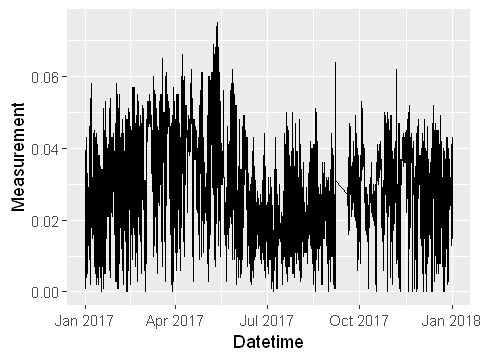

In [80]:
ggplot(data=Brevard_Hourly, aes(x=Datetime, y=Measurement)) +
geom_line()

Once again, it seems we need to aggregate, this time by Datetime.

In [81]:
Brevard_Hourly<-aggregate(Measurement~Datetime, Brevard_Hourly, mean)

Let's plot this, along with a smooth geom.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


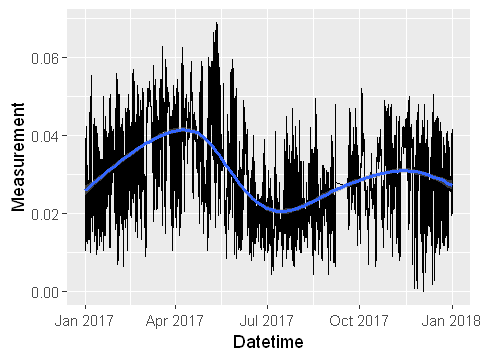

In [82]:
ggplot(data=Brevard_Hourly, aes(x=Datetime, y=Measurement)) +
geom_line() +
geom_smooth()

A useful visualization might be to overlap the graph above with a semi-transparent rectangle that showcases where to look for the decreases of ozone.

These rectangles should:
1. Start at the launch time.
2. End after a 12 hour interval.
3. Stretch to the top and bottom of hour graph.

The start times are easy enough to fetch - they're just the datetime coloumn. Let's put them in a variable called 'start'.

In [83]:
start<-Launches17$Datetime

The end times are a bit trickier. They consist of ths start times with 12 hours (or 60\*60\*12 seconds) added onto them.

In [84]:
end<-start+1*60*60*12

We can now put the start and end times into an easy-to-access dataframe! Let's call it 'rects'.

In [85]:
rects<-data.frame(start, end)

We'll use **geom_rect()** to draw the rectangles, passing in our 'rects' dataframe as the data argument.

To make the top and bottom stretch throughout our graph, set ymax to Inf and ymin to -Inf.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


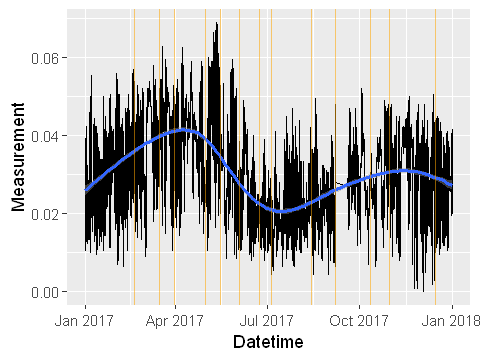

In [86]:
ggplot(data=Brevard_Hourly, aes(x=Datetime, y=Measurement)) +
geom_line() +
geom_smooth()+
geom_rect(data=rects, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-Inf,
                ymax=Inf), color="transparent", fill="orange", alpha=0.55)

This is great, but our scope is so broad we can't really see the ozone levels. We'd have to scale our axes.

To do this, let's start with the first launch. We should get the date of the first launch, and our graph should show the ozone levels of the day of the launch, but also some 'buffer' on either side of one or two days.

Let's say that the lower bound of our x axis will be the day before the launch, while the upper bound will be two days after the launch. That gives us some context as to what we're seeing.

In [87]:
lower<-as.character(as.Date(start[1])-1)
upper<-as.character(as.Date(start[1])+2)

Now, we should collect the ozone data that corresponds to this time interval using conditional indices.

In [88]:
First_Ozone<-Brevard_Hourly[Brevard_Hourly$Datetime>=lower & Brevard_Hourly$Datetime<=upper,]

Let's visualize this! Remember, for our rect geom, we're only visualizing the first launch. As such, we should pass in only the first row of the 'rects' dataset.

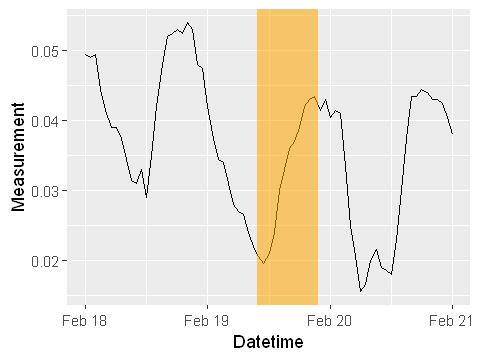

In [89]:
ggplot(data=First_Ozone, aes(x=Datetime, y=Measurement)) +
geom_line() +
geom_rect(data=rects[1,], inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-Inf,
                ymax=Inf), color="transparent", fill="orange", alpha=0.55)

An increase in ozone? It's followed by a steep drop right after, which, going by the general trend of the data, seems to be a common pattern.

How about the other launches? Instead of going through this entire process over and over again, we can **write a function** that accepts the index of the launch that we want to look at.

This is much easier to use.

In [90]:
visualizr<-function(index)
{
    lower<-as.character(as.Date(start[index])-1)
    upper<-as.character(as.Date(start[index])+2)
    Index_Ozone<-Brevard_Hourly[Brevard_Hourly$Datetime>=lower & Brevard_Hourly$Datetime<=upper,]
    
    myPlot3 <- ggplot(data=Index_Ozone, aes(x=Datetime, y=Measurement)) +
    geom_line() +
    geom_rect(data=rects[index,], inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-Inf,
                ymax=Inf), color="transparent", fill="orange", alpha=0.5) +
    geom_vline(xintercept=start[index], col='navy', size=1.5, alpha=0.5)
    
    return(myPlot3)
}

You can play around with this and investigate all of the launches.

The eleventh launch might produce similar results.

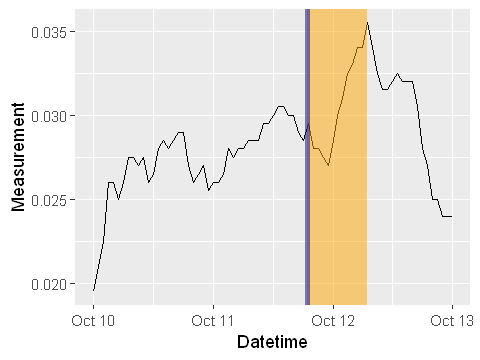

In [91]:
visualizr(11)

There doesn't seem to be any consistent trends! Further analysis would be needed.
For now, though, let's turn our attention to another question - the question of nitrogen dioxide. SpaceX Launches tend to release nitrogen dioxide, which is associated with decrease in ozone.
Let's see if we can see this decrease in action!

The first step is to once again use read_csv() to import the Nitrogen Dioxide levels dataset from 2016 to 2018.

In [92]:
Nitrogen_Data<-read_csv('The Four Gases in Cohorts//Nitrogen Dioxide//Nitrogen Dioxide levels from 2016 to 2018.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  State.Code = col_integer(),
  County.Code = col_integer(),
  Site.Num = col_integer(),
  Parameter.Code = col_integer(),
  POC = col_integer(),
  Latitude = col_double(),
  Longitude = col_double(),
  Date.Local = col_date(format = ""),
  Observation.Count = col_integer(),
  Observation.Percent = col_integer(),
  Arithmetic.Mean = col_double(),
  X1st.Max.Value = col_double(),
  X1st.Max.Hour = col_integer(),
  AQI = col_integer(),
  Method.Code = col_integer(),
  Date.of.Last.Change = col_date(format = "")
)
See spec(...) for full column specifications.


Let's take a look at the first six rows of our dataset.

In [93]:
head(Nitrogen_Data)

State.Code County.Code Site.Num Parameter.Code POC Latitude Longitude Datum
1 1          73          23       42602          1   33.55306 -86.815   WGS84
2 1          73          23       42602          1   33.55306 -86.815   WGS84
3 1          73          23       42602          1   33.55306 -86.815   WGS84
4 1          73          23       42602          1   33.55306 -86.815   WGS84
5 1          73          23       42602          1   33.55306 -86.815   WGS84
6 1          73          23       42602          1   33.55306 -86.815   WGS84
  Parameter.Name         Sample.Duration ... AQI Method.Code
1 Nitrogen dioxide (NO2) 1 HOUR          ...  4  200        
2 Nitrogen dioxide (NO2) 1 HOUR          ... 25  200        
3 Nitrogen dioxide (NO2) 1 HOUR          ... 19  200        
4 Nitrogen dioxide (NO2) 1 HOUR          ...  6  200        
5 Nitrogen dioxide (NO2) 1 HOUR          ... 26  200        
6 Nitrogen dioxide (NO2) 1 HOUR          ... 32  200        
  Method.Name                                                       
1 Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence
2 Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence
3 Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence
4 Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence
5 Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence
6 Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence
  Local.Site.Name  Address                               State.Name County.Name
1 North Birmingham NO. B'HAM,SOU R.R., 3009 28TH ST. NO. Alabama    Jefferson  
2 North Birmingham NO. B'HAM,SOU R.R., 3009 28TH ST. NO. Alabama    Jefferson  
3 North Birmingham NO. B'HAM,SOU R.R., 3009 28TH ST. NO. Alabama    Jefferson  
4 North Birmingham NO. B'HAM,SOU R.R., 3009 28TH ST. NO. Alabama    Jefferson  
5 North Birmingham NO. B'HAM,SOU R.R., 3009 28TH ST. NO. Alabama    Jefferson  
6 North Birmingham NO. B'HAM,SOU R.R., 3009 28TH ST. NO. Alabama    Jefferson  
  City.Name  CBSA.Name             Date.of.Last.Change
1 Birmingham Birmingham-Hoover, AL 2017-03-22         
2 Birmingham Birmingham-Hoover, AL 2017-03-22         
3 Birmingham Birmingham-Hoover, AL 2017-03-22         
4 Birmingham Birmingham-Hoover, AL 2017-03-22         
5 Birmingham Birmingham-Hoover, AL 2017-03-22         
6 Birmingham Birmingham-Hoover, AL 2017-03-22

It look pretty similar to before! Let's look at the coloumn names again.

In [94]:
names(Nitrogen_Data)

[1] "State.Code"          "County.Code"         "Site.Num"           
 [4] "Parameter.Code"      "POC"                 "Latitude"           
 [7] "Longitude"           "Datum"               "Parameter.Name"     
[10] "Sample.Duration"     "Pollutant.Standard"  "Date.Local"         
[13] "Units.of.Measure"    "Event.Type"          "Observation.Count"  
[16] "Observation.Percent" "Arithmetic.Mean"     "X1st.Max.Value"     
[19] "X1st.Max.Hour"       "AQI"                 "Method.Code"        
[22] "Method.Name"         "Local.Site.Name"     "Address"            
[25] "State.Name"          "County.Name"         "City.Name"          
[28] "CBSA.Name"           "Date.of.Last.Change"

Before we only the coloumns we might need, let's check the units of measurement again. After all, it could very well be different from the units of measurement of ozone levels.

In [95]:
unique(Nitrogen_Data$Units.of.Measure)

[1] "Parts per billion"

Indeed it is! The concentration of nitrogen dioxide is measured in units a thousand times smaller than that of ozone measurements! We can rectify this by simply dividing the arithmetic mean measurements of nitrogen dioxide by a thousand to get our measurements in parts per million.

In [96]:
Nitrogen_Data$Arithmetic.Mean<-Nitrogen_Data$Arithmetic.Mean/1000

Now we can filter out the other coloumns!

In [97]:
Nitrogen_Data<-Nitrogen_Data[c('Latitude', 'Longitude', 'Date.Local', 'Arithmetic.Mean', 'AQI')]

Let's take a look at our new dataset.

In [98]:
head(Nitrogen_Data)

Latitude Longitude Date.Local Arithmetic.Mean AQI
1 33.55306 -86.815   2016-01-01 0.002520833      4 
2 33.55306 -86.815   2016-01-02 0.008437500     25 
3 33.55306 -86.815   2016-01-03 0.012750000     19 
4 33.55306 -86.815   2016-01-04 0.003141667      6 
5 33.55306 -86.815   2016-01-05 0.009316667     26 
6 33.55306 -86.815   2016-01-06 0.014587500     32

Now, suppose we wanted to merge the ozone dataset and the nitrogen dataset. Before we do this, we should change the name of the AQI levels and the arithmetic mean measurements to remind us that they pertain to nitrogen dioxide measurements.

We might also want to make the 'Date' variable easier to access!

In [99]:
names(Nitrogen_Data)[c(3:5)]<-c('Date', 'Nitrogen.Mean', "Nitrogen.AQI")

Let's do the same thing with the ozone arithmetic mean and the ozone AQI. Taking a look at the names:

In [100]:
names(Ozone_Data)

[1] "Latitude"        "Longitude"       "Date"            "Arithmetic.Mean"
[5] "AQI"             "County"          "Zone"

We see we should change the fourth and fifth ones.

In [101]:
names(Ozone_Data)[c(4,5)]<-c('Ozone.Mean', "Ozone.AQI")

Now, we're ready to merge our two datasets! To ensure these are readings that happened at the same time and the same place, let's merge them by longitude, latitude, and date.

In [102]:
Gas_Data<-merge(Ozone_Data, Nitrogen_Data, by=c('Longitude', 'Latitude', 'Date'))

Now, we can visualize ozone levels vs. nitrogen levels!

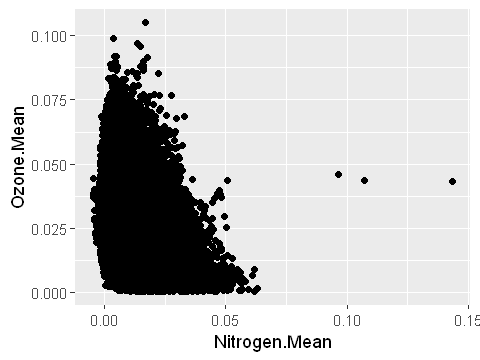

In [103]:
ggplot(data=Gas_Data, aes(x=Nitrogen.Mean, y=Ozone.Mean)) + geom_point()

Our graph is being squished to allow for those outliers waaaay out right. To get around this, let's use the **xlim()** function to limit our graph to showing only the bulk of our data.

Keep in mind that outliers may be important and it's not a good idea to just disregard them - however, in this case, it'll help our visualization.

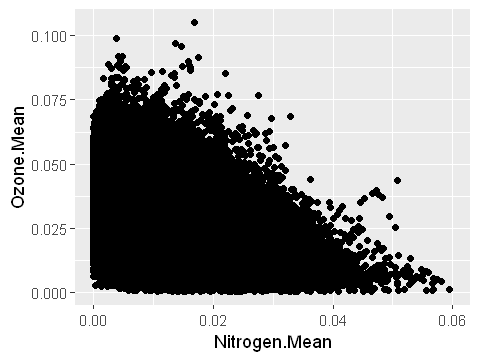

In [104]:
ggplot(data=Gas_Data, aes(x=Nitrogen.Mean, y=Ozone.Mean)) + geom_point() + xlim(0, 0.06)

Another problem here is with **overplotting**. Overplotting has many different approaches, but the one we can use is to decrease the **alpha** and and size of the points.

Let's save the resulting plot in a variable called GasPlot.

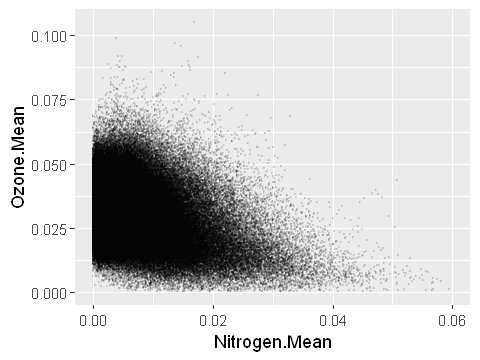

In [105]:
GasPlot<-ggplot(data=Gas_Data, aes(x=Nitrogen.Mean, y=Ozone.Mean)) + geom_point(size=0.01, alpha=0.1) + xlim(0, 0.06)
GasPlot

Alright - a general downwards trend! Let's see if a linear trendline confirms that.

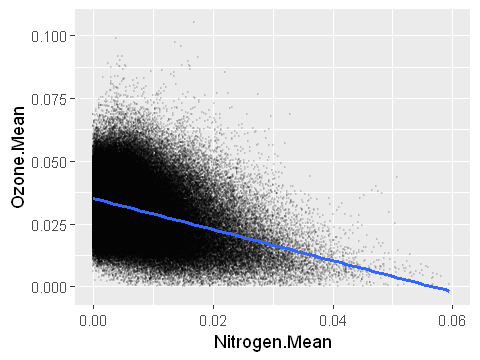

In [106]:
GasPlot + geom_smooth(method='lm')

That's fantastic, but we could use a bit more information. After all, while the downwards trend does seem to be promising, the huge blob at the beginning doesn't seem to have a preference in a certain direction. Our R-squared value could indicate that this downward trend is actually not as promising as we'd like.

To find our for sure, we can calculate the formula for this line ourselves!

A **linear regression line** takes the form of 

$$ \begin{equation} y = mx + b\end{equation} $$

as

$$ \hat{Y}_i =  \hat{\beta}_1 X_i + \hat{\beta}_0 + \hat{\epsilon}_i $$

Where B1 is the slope of the equation, B0 is the y-intercept, and the epsilon (e) is the error.

To find the slope, we find the **covariance** between the two variables and divide by the **variance** of the x variable.

$$ \begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation} $$

Luckily, those are easy to find using the R functions **covar()** and **var()**!
Let's save them in the variables xy.covar and x.var respectively.

In [107]:
xy.covar<-cov(Gas_Data$Nitrogen.Mean, Gas_Data$Ozone.Mean, )
x.var<-var(Gas_Data$Nitrogen.Mean)

And the slope will just be their quotient! Let's save it in a variable called lin.slope.

In [108]:
lin.slope=xy.covar/x.var

Now, we can calculate the y-intercept.

It's given by the equations:

$$ \begin{equation}
\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}
\end{equation} $$

Wherein the bars indicate a **sample mean**. Notice how we can use our previous slope calculation here! This is once again made easy with R's built-in **mean()** function.
Let's save this value in a variable called lin.y.int.

In [109]:
lin.y.int<-mean(Gas_Data$Ozone.Mean) - mean(Gas_Data$Nitrogen.Mean)*lin.slope

Now, we have enough information to plot this on our graph using the **geom_abline()** layer!

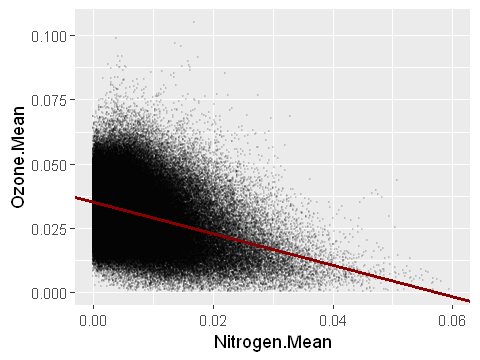

In [110]:
GasPlot + geom_abline(slope=lin.slope, intercept=lin.y.int, size=1, col='darkred')

Excellent! It looks just like what we had with our smooth geom! 

Let's save this plot as our new GasPlot.

In [111]:
GasPlot <- GasPlot + geom_abline(slope=lin.slope, intercept=lin.y.int, size=1, col='darkred')

Now we get to the critical part. The R of a plot gives us the strength of the correlation - the R-squared is, intuitively, that value squared.

To get the R, let's write our own function that takes in two vectors and gives us their R.

The formula is given as:

\begin{equation}
\frac{n \sum(XY) - \sum(X)\sum(Y)} {\sqrt{(n\sum(X^2) - \sum(X)^2) (n\sum(Y^2) - \sum(Y)^2)}}
\end{equation}

Where n is the number of elements in our sample.

*If the notation confuses you, please check out our stats workshop!*

We can make the task more readable and easy by having a top (numerator) and bottom (denominator) to our calcuation and dividing those.

In [112]:
get_r<-function(x,y)
{
    top<-(length(x)*sum(x*y)) - (sum(x)*sum(y))
    bottom<-(length(x)*sum(x^2)-sum(x)^2)*(length(y)*sum(y^2)-sum(y)^2)
    return(top/bottom)
}

Next, all we have to do is to use our function and save the result in a variable - let's call it r.cof.

In [113]:
r.cof<-get_r(Gas_Data$Nitrogen.Mean, Gas_Data$Ozone.Mean)

Let's take a look at the R and R-squared values!

In [114]:
r.cof
r.cof^2

[1] -7.999476e-08

[1] 6.399162e-15

Excellent. We can put of our information together using the paste() function.

Let's list the slope, y-intercept, the R-squared value, and the R value!

In order not to make our numbers unruly, we can round to three decimal places. Keep in mind that the **round()** function should accept much larger place arguments for smaller numbers.

Note that '\n' results in a linebreak, so putting that before each value makes your label more compact and easier to read.

Save your label in a variable called lin.info.

In [115]:
lin.info<-paste('Slope:', round(lin.slope, 3), '\n Y-Int:', round(lin.y.int, 3), '\n R:', round(r.cof, 10), '\n R-Squared:', round((r.cof)^2, 17))
lin.info

[1] "Slope: -0.616 \n Y-Int: 0.035 \n R: -8e-08 \n R-Squared: 6.4e-15"

Lastly, we can simply put our label on a place where it will fit nicely on the graph!

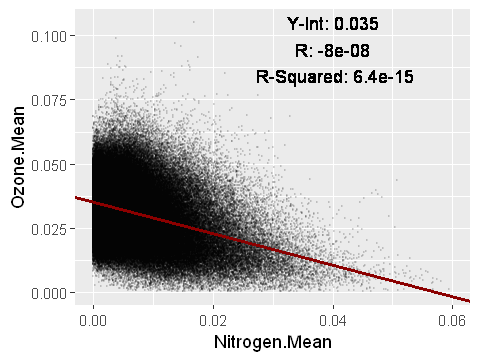

In [116]:
GasPlot + geom_text(inherit.aes=FALSE, aes(x=0.04, y=0.1, label=lin.info))

And that brings this example to an end.

We have found that ozone levels remain unaffected after SpaceX Launches, and that nitrogen levels appear to have a negative relationship with ozone levels - although it's far from a perfect relationship, as there are a lot of data that are unaccounted for.

As a disclaimer, this example has major flaws. Your projects should me much more thorough in investigating significance, and you can pull data from a variety of sources.